<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Нужно построить модель с предельно большим значением *F1*-меры. Целевое значение метририки = 0.59. 


Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Согласно предоставленной документации, ниже приведена расшифровка столбцов.

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Рассмотрим инфомрацию о предоставленном датасете.

## Подготовка данных

Загрузим все необходимые библиотеки.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings


In [2]:
warnings.simplefilter("ignore")
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (15, 5)})

Рассмотрим предоставленный датасет.

In [3]:
try:
    df = pd.read_csv('Churn.csv', index_col='RowNumber')
except:
    df = pd.read_csv('/datasets/Churn.csv', index_col='RowNumber')


df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


Пропущенные значения находятся в столбце Tenure (сколько лет человек являлся клиентом банка). К ним далее вернемся дополнительно.

Проверим наличиие явных дубликатов в датасете.


In [5]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют.

In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Рассмотрели данные. Данный тип задачи относится к типу "обучение с учителем" - имеются стобцы признаки и целевой признак Exited. 

Произведем переименование колонок, а именно приведем их к нижнему регистру.

In [7]:
df.columns = df.columns.str.replace(r'(?<!^)(?=[A-Z])', '_').str.lower()
df.index = df.index.rename('row_number')

df.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
row_number,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Проверим долю пропущенных значений в столбце Tenure.

In [8]:
df_tenure_isna = df['tenure'].isna().sum()/df['tenure'].count()
df_tenure_isna

0.0999890001099989

In [9]:
df['tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [10]:
df['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

<Axes: >

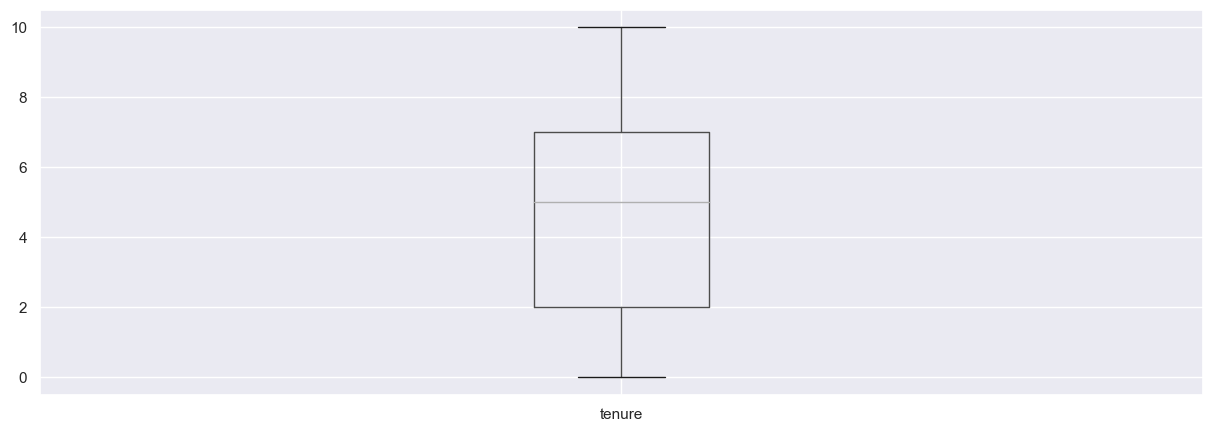

In [11]:
df.boxplot('tenure')

Проруски достигают 10% от всего датасета. 
5 лет - медианное значение. Основная часть данных находится между 2 и 7 годами.
Поэтому чтобы не потерять важную информацию заменим на данном этапе пропуски медианным значением.

In [12]:
df['tenure'] = df['tenure'].fillna(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   surname           10000 non-null  object 
 2   credit_score      10000 non-null  int64  
 3   geography         10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   tenure            10000 non-null  float64
 7   balance           10000 non-null  float64
 8   num_of_products   10000 non-null  int64  
 9   has_cr_card       10000 non-null  int64  
 10  is_active_member  10000 non-null  int64  
 11  estimated_salary  10000 non-null  float64
 12  exited            10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


In [13]:
df['tenure'] = df['tenure'].astype('int64')

Исследуем более подробно данные.

***credit_score***

In [14]:
df['credit_score'].describe().to_frame()

,credit_score
count,10000.000000
mean,650.528800
std,96.653299
min,350.000000
25%,584.000000
50%,652.000000
75%,718.000000
max,850.000000


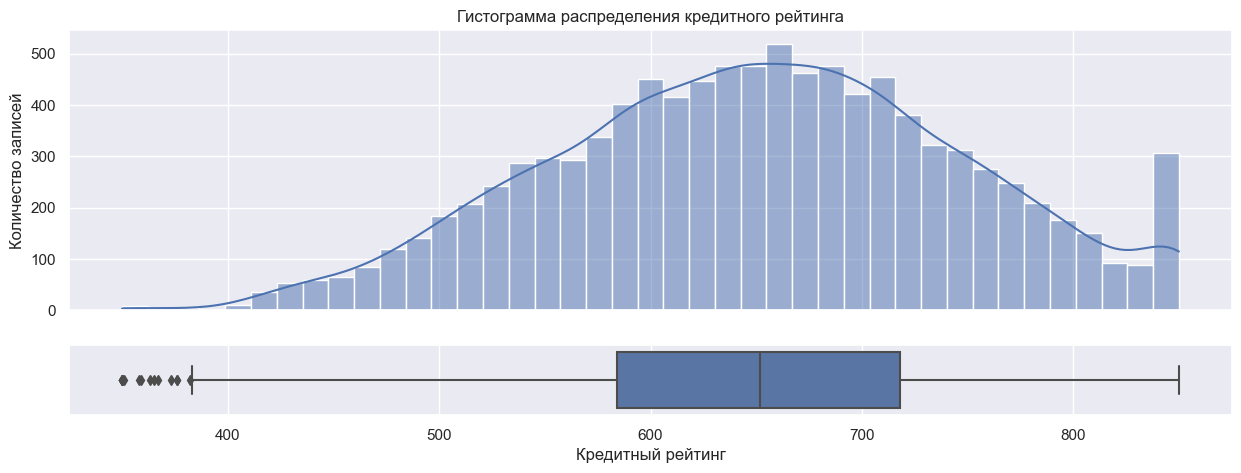

In [15]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='credit_score', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения кредитного рейтинга',
     ylabel='Количество записей')
sns.boxplot(data=df, x='credit_score', ax=axs_box)\
.set(xlabel='Кредитный рейтинг')
plt.show()

Значения кредитного рейтинга лежат в диапазоне от 350 до 850, медианное значение — 652, что довольно близко к среднему (650). Распределение похоже на нормальное, но наблюдается довольно большое количество записей с кредитным рейтингом около 850.

***geography***

In [16]:
df['geography'].value_counts().to_frame()

,geography
France,5014
Germany,2509
Spain,2477


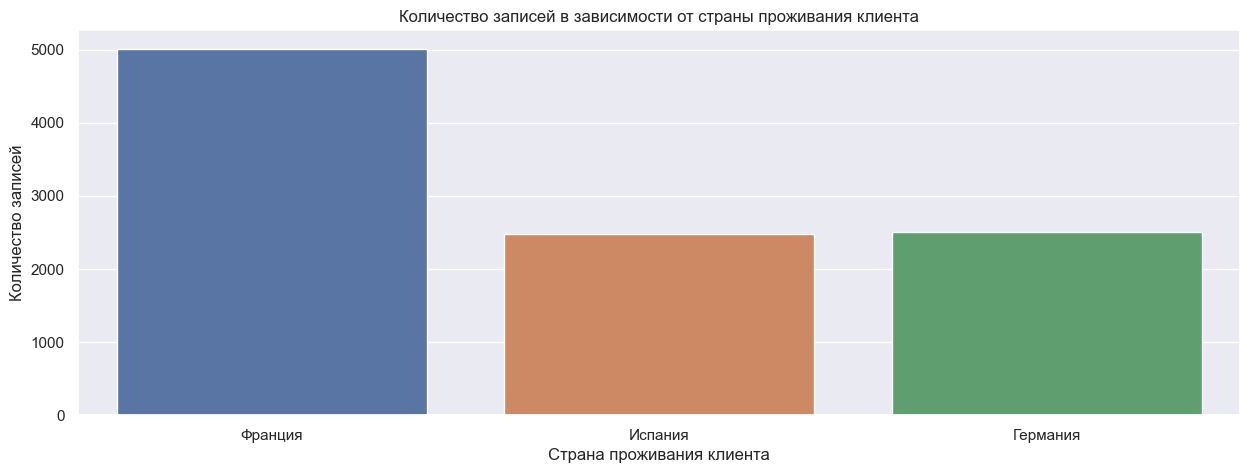

In [17]:
ax = sns.countplot(data=df, x='geography')
ax.set(xticklabels = (['Франция', 'Испания', 'Германия']))
plt.title('Количество записей в зависимости от страны проживания клиента')
plt.xlabel('Страна проживания клиента')
plt.ylabel('Количество записей')
plt.show()

Видно, что в таблице представлены данные о клиентах из трёх стран: Франции, Испании и Германии. Больше всего данных о пользователях из Франции.

***gender***

In [18]:
df['gender'].value_counts().to_frame()

,gender
Male,5457
Female,4543


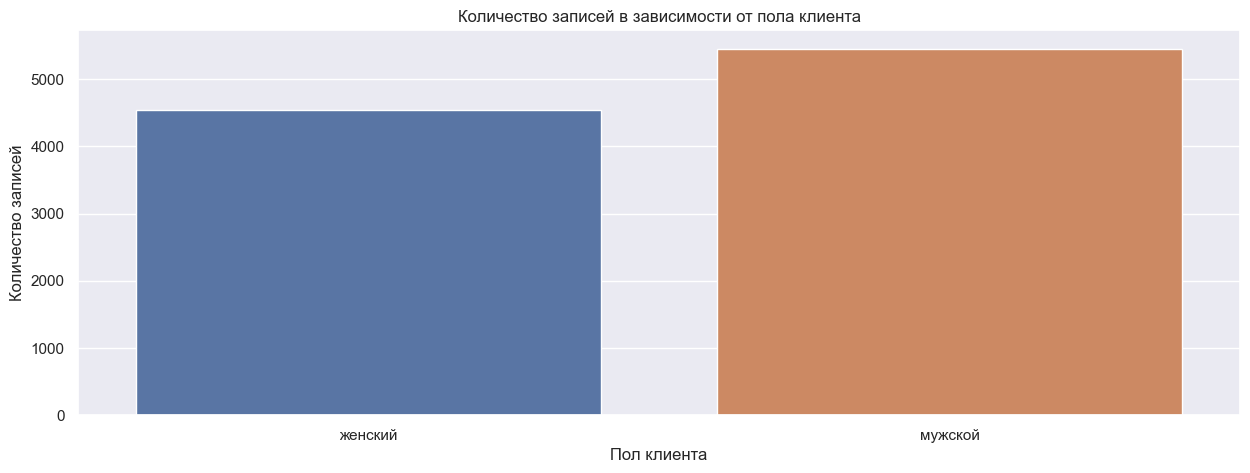

In [19]:
ax = sns.countplot(data=df, x='gender')
ax.set(xticklabels = (['женский', 'мужской']))
plt.title('Количество записей в зависимости от пола клиента')
plt.xlabel('Пол клиента')
plt.ylabel('Количество записей')
plt.show()

***age***

In [20]:
df['age'].describe().to_frame()

,age
count,10000.000000
mean,38.921800
std,10.487806
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,92.000000


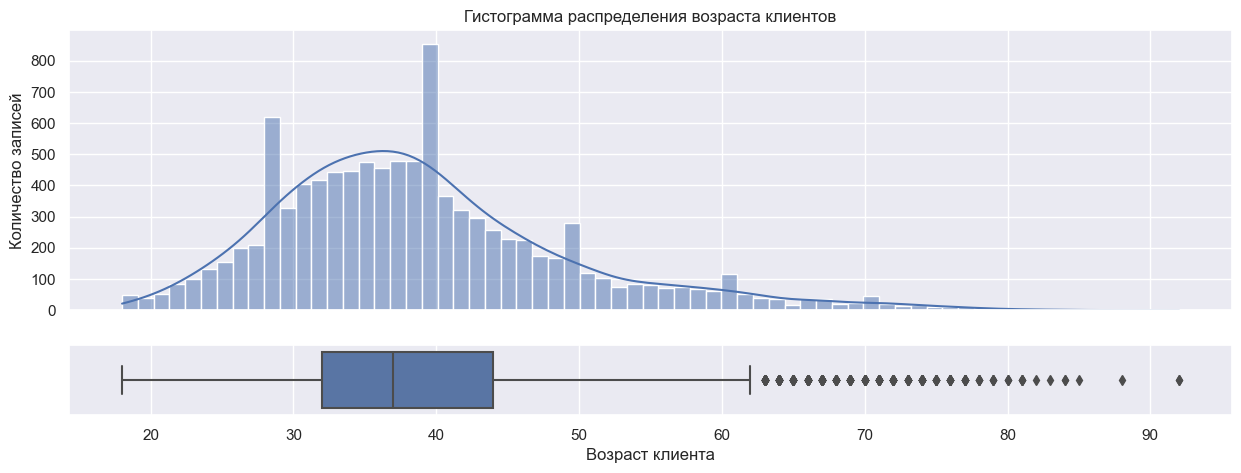

In [21]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='age', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения возраста клиентов',
     ylabel='Количество записей')
sns.boxplot(data=df, x='age', ax=axs_box)\
.set(xlabel='Возраст клиента')
plt.show()

Значения возрастов клиентов лежат в диапазоне от 18 до 92 лет, медианное значение — 37 лет, что довольно близко к среднему (39 лет). Распределение не похоже на нормальное, имеется довольно длинный правый хвост. На гистограмме видны подозрительные "выбросы" для возрастов 28, 40, 50, 60 лет. Возможно это ошибки в данных, но сделать аргументированное предположение о природе их возникновения довольно сложно.

***tenure***

In [22]:
df['tenure'].describe().to_frame()

,tenure
count,10000.00000
mean,4.99790
std,2.76001
min,0.00000
25%,3.00000
50%,5.00000
75%,7.00000
max,10.00000


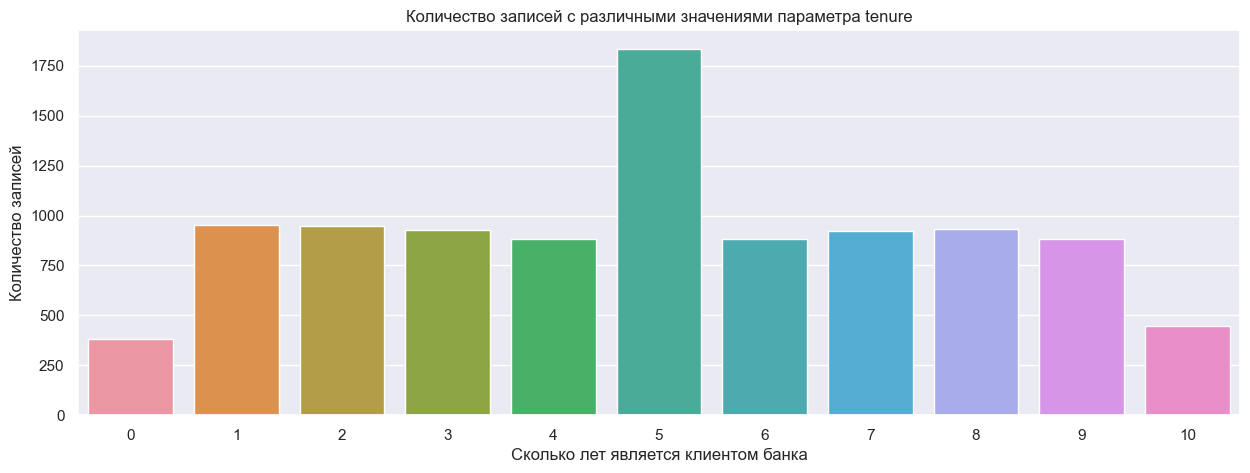

In [23]:
sns.countplot(data=df, x='tenure')\
.set(title='Количество записей с различными значениями параметра tenure',
     xlabel='Сколько лет является клиентом банка',
     ylabel='Количество записей')
plt.show()

Значения параметра tenure лежат в диапазоне от 0 до 10 лет, медианное и среднее занчения — 5 лет. На графике видна мода на значении 5 лет.

***balance***

In [24]:
df['balance'].describe().to_frame()

,balance
count,10000.000000
mean,76485.889288
std,62397.405202
min,0.000000
25%,0.000000
50%,97198.540000
75%,127644.240000
max,250898.090000


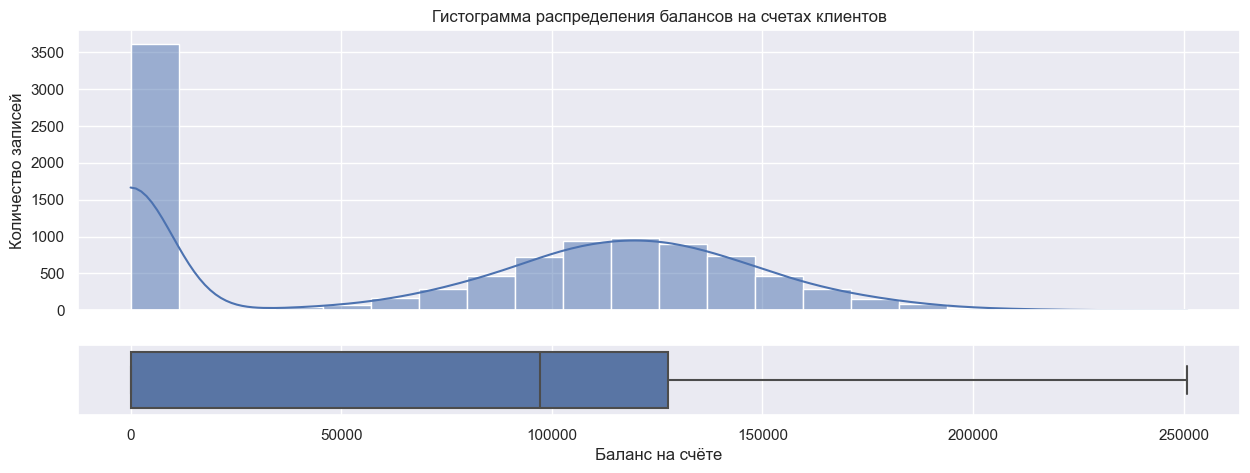

In [25]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='balance', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения балансов на счетах клиентов',
     ylabel='Количество записей')
sns.boxplot(data=df, x='balance', ax=axs_box)\
.set(xlabel='Баланс на счёте')
plt.show()

Значения балансов на счетах лежат в диапазоне от 0 до 250 тысяч, медианное значение — 97 тысяч, среднее — 76 тысяч. На гистограмме видно, что у значительного количества клиентов нулевой баланс на счёте, что печально.

***num_of_products***

In [26]:
df['num_of_products'].describe().to_frame()

,num_of_products
count,10000.000000
mean,1.530200
std,0.581654
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


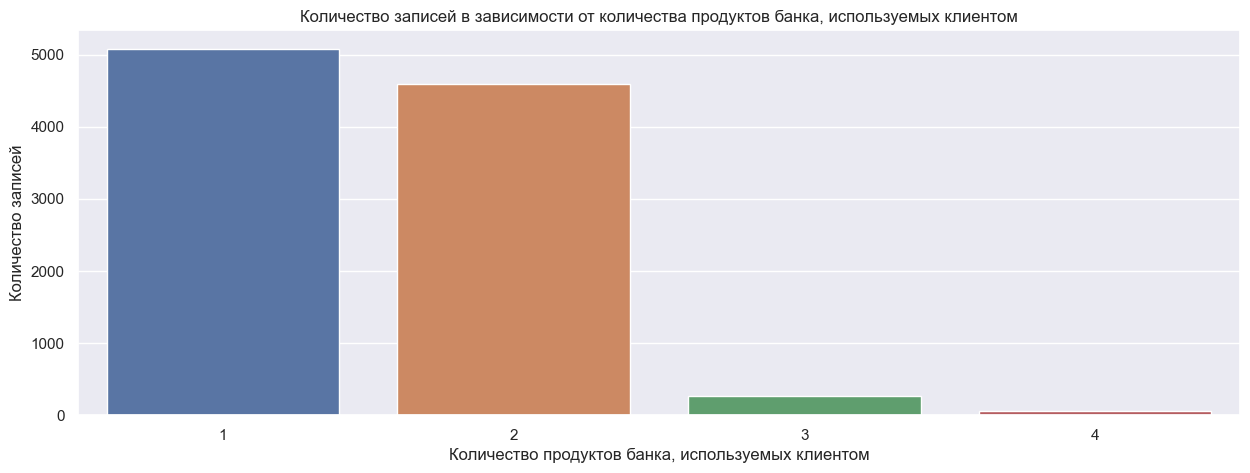

In [27]:
sns.countplot(data=df, x='num_of_products')
plt.title('Количество записей в зависимости от количества продуктов банка, используемых клиентом')
plt.xlabel('Количество продуктов банка, используемых клиентом')
plt.ylabel('Количество записей')
plt.show()

Видно, что клиенты банка используют от 1 до 4 продуктов банка. При этом подавляющее большинство клиентов используют 1—2 продукта.

***has_cr_card***

In [28]:
df['has_cr_card'].value_counts().to_frame()

,has_cr_card
1,7055
0,2945


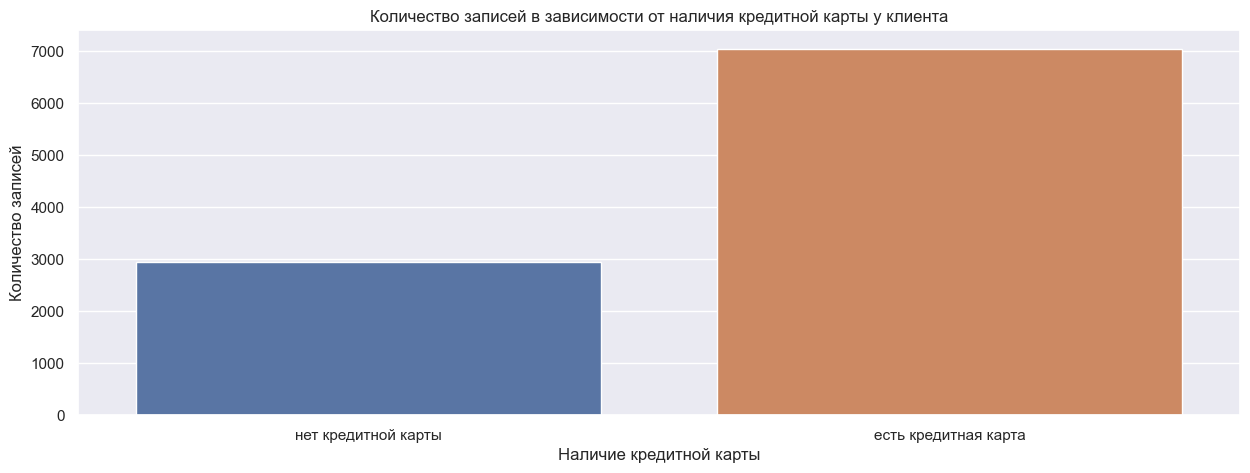

In [29]:
ax = sns.countplot(data=df, x='has_cr_card')
ax.set(xticklabels = (['нет кредитной карты', 'есть кредитная карта']))
plt.title('Количество записей в зависимости от наличия кредитной карты у клиента')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Количество записей')
plt.show()

Видно, что у большниства клиентов банка есть кредитная карта. Значит услуга кредитования пользуется большой популярностью у клиентов банка.

***is_active_member***

In [30]:
df['is_active_member'].value_counts().to_frame()

,is_active_member
1,5151
0,4849


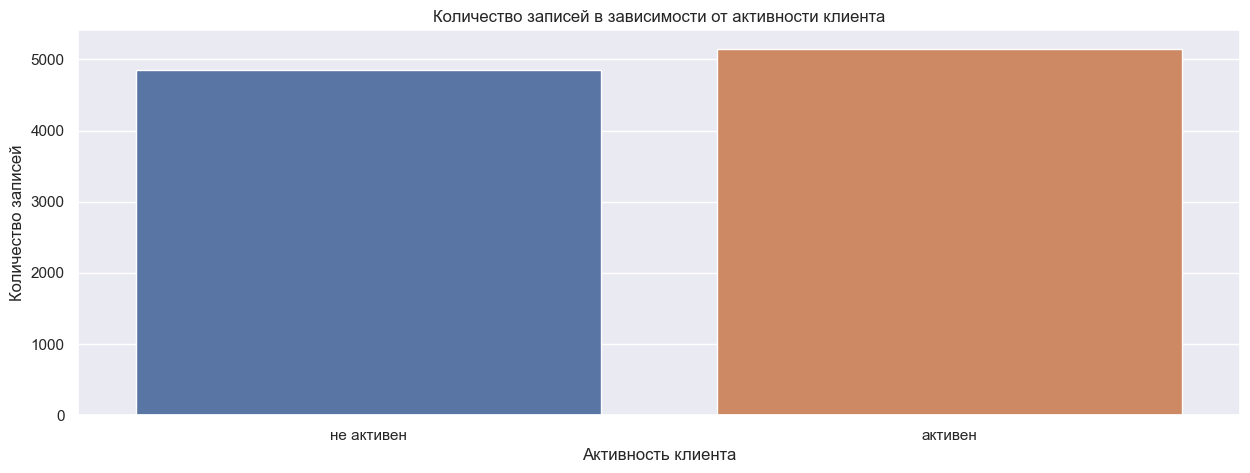

In [31]:
ax = sns.countplot(data=df, x='is_active_member')
ax.set(xticklabels = (['не активен', 'активен']))
plt.title('Количество записей в зависимости от активности клиента')
plt.xlabel('Активность клиента')
plt.ylabel('Количество записей')
plt.show()

Записи об активных и не активных клиентах банка распределены примерно поровну.

***estimated_salary***

In [32]:
df['estimated_salary'].describe().to_frame()

,estimated_salary
count,10000.000000
mean,100090.239881
std,57510.492818
min,11.580000
25%,51002.110000
50%,100193.915000
75%,149388.247500
max,199992.480000


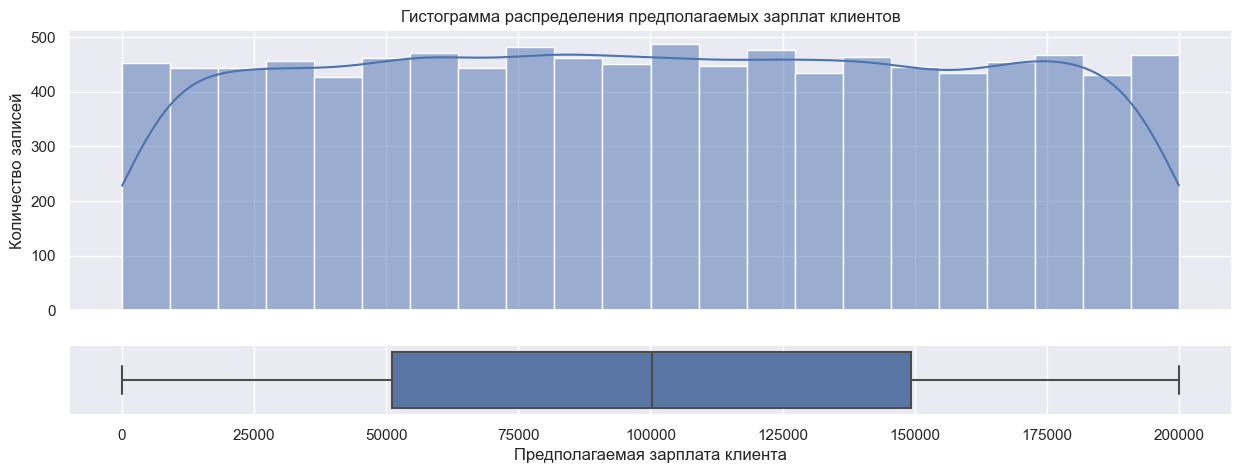

In [33]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='estimated_salary', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения предполагаемых зарплат клиентов',
     ylabel='Количество записей')
sns.boxplot(data=df, x='estimated_salary', ax=axs_box)\
.set(xlabel='Предполагаемая зарплата клиента')
plt.show()

Значения предполагаемых зарплат клиентов лежат в диапазоне от 12 до 200000, медианное значение — 100 тысяч, что довольно близко к среднему. При этом распределение предполагаемых зарплат выглядит неправдоподобно — количество записей практически не зависит от предполагаемой зарплаты, хотя можно было бы предположить, что распределение будет больше напоминать нормальное. Возможно это связано с какими-то ошибками в данных, но для проверки этой гипотезы требуется дополнительное исследование. Построим также график зависимости оценки заработной платы от возраста. Можно предположить, что у молодых и пожилых клиентов зарплата будет ниже, чем у клиентов среднего возраста.

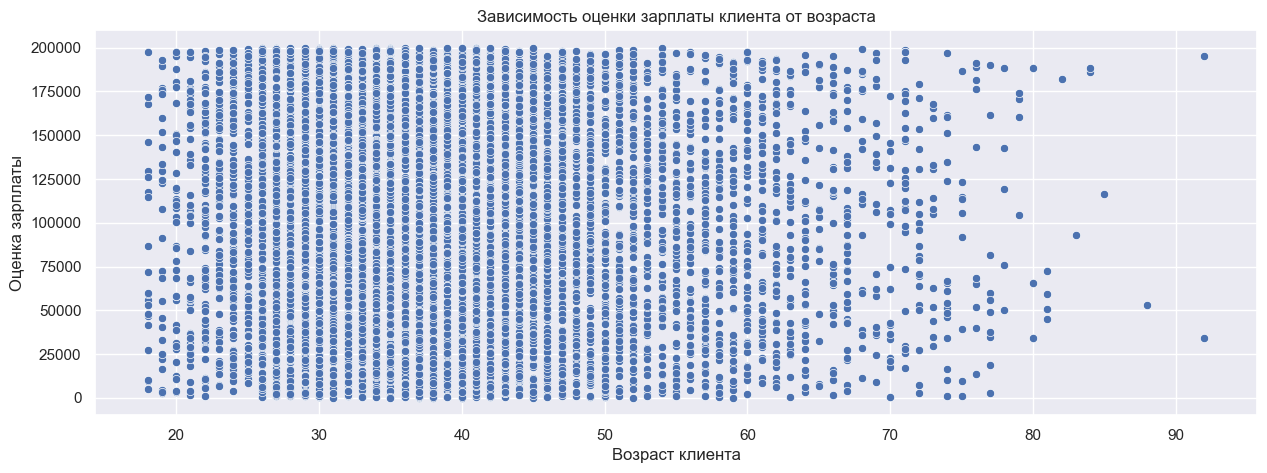

In [34]:
sns.scatterplot(data=df, y='estimated_salary', x='age')
plt.title('Зависимость оценки зарплаты клиента от возраста')
plt.xlabel('Возраст клиента')
plt.ylabel('Оценка зарплаты')
plt.show()

На графике не наблюдается существенной разницы в разбросах зарплат между клиентами 18, 40 и 70 лет, что довольно подозрительно.

***exited***

In [35]:
df['exited'].value_counts().to_frame()

,exited
0,7963
1,2037


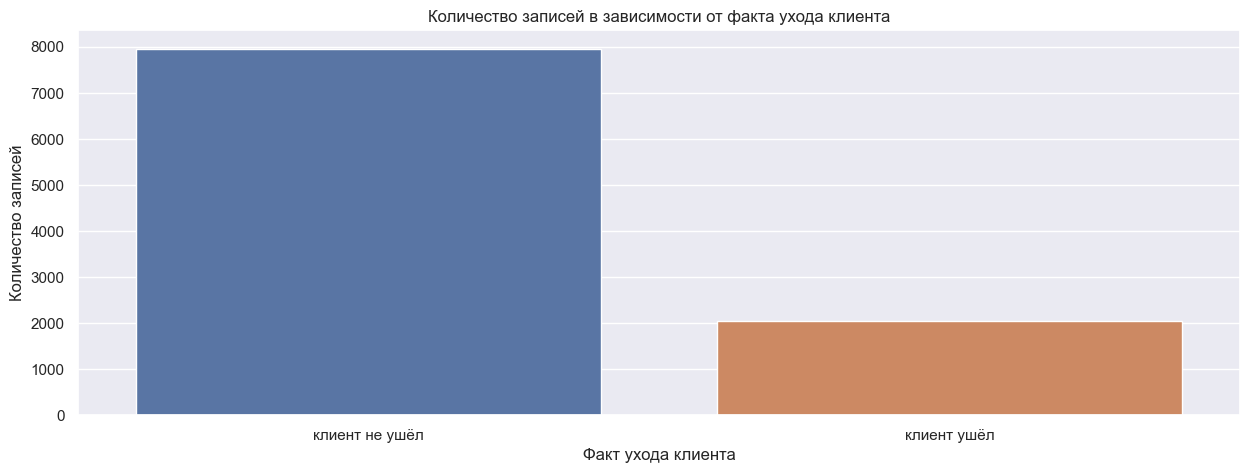

In [36]:
ax = sns.countplot(data=df, x='exited')
ax.set(xticklabels = (['клиент не ушёл', 'клиент ушёл']))
plt.title('Количество записей в зависимости от факта ухода клиента')
plt.xlabel('Факт ухода клиента')
plt.ylabel('Количество записей')
plt.show()

Видно, что в нашей таблице наблюдается дисбаланс классов — данных о клиентах, оставшихся в банке, заметно больше. Это может оказаться важным при построении моделей.

**Произведем проверку корреляции признаков**

In [37]:
df.corr()

,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
customer_id,1.000000,0.005308,0.009497,-0.020331,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,-0.000060,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.012606,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.020331,-0.000060,-0.012606,1.000000,-0.007535,0.011409,0.025979,-0.030681,0.010049,-0.015989
balance,-0.012419,0.006268,0.028308,-0.007535,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
num_of_products,0.016972,0.012238,-0.030680,0.011409,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
has_cr_card,-0.014025,-0.005458,-0.011721,0.025979,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
is_active_member,0.001665,0.025651,0.085472,-0.030681,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.010049,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.006248,-0.027094,0.285323,-0.015989,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [38]:
sns.heatmap(df.corr(), square=True, cmap='Blues')\
.set(title='Матрица корреляций');

Видно, что между данными в различных колонках почти не наблюдается корреляции.

В датасете присудтсвуют столбы, содержание которых в формате object. Чтобы далее корректно обрабатывать данные применит метод ОНЕ.

Целевым признаком по прогнозу оттока клиентов будет являться Exited.

Для начала из таблицы удалим ненужные признаки: Surname, CustomerId, RowNumber. Они нам не помогут в дальнейшем иследовании.

In [39]:
df = df.drop(["surname"], axis=1)
df = df.drop(["customer_id"], axis=1)  


df = pd.get_dummies(df, drop_first=True)

df.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
row_number,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


На данном этапе сделаем следующее: 

-выделим целевой признак.

-разобъем исходный датасет на 3-выборки: обучающая, валидационная, тестовая. 

-сделаем преобразование по масштабу у признаков.

In [40]:
features = df.drop(['exited'], axis=1)
target = df['exited'] 


df_train, df_work = train_test_split(df, test_size=0.4, random_state=12345)


df_valid, df_test = train_test_split(df_work, test_size=0.5, random_state=12345)


features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']

features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']

features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']


numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])


features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

pd.options.mode.chained_assignment = None

**Вывод.** Информация рассмотрена, пропуски заменены на медианные значения, ненужные признаки удалены из датасета. Выделен целевой признак и остальные, по которым будем готовить модели по методике обучение с учителем. Также проведено масштабирование признаков.

## Исследование задачи

**Баланс классов**: по результатам проверки датасета видно, что 80% в целевом признаке Exited составляет "0" и 20% "1". Данный дисбаланс значителен и может повлиять на дальнейшее исследование. 

Далее рассмотрим, какая из моделей лучше всего подойдет для предсказания оттока клиентов. На данном этапе без Учета баланса. 

**1) Дерево решений.** Определелим наиболее оптимальные параметры без учета баланса и построим модель.

In [41]:
model_dtc = DecisionTreeClassifier()
parametrs_dtc = {'max_depth': range (2, 10, 1),
                'criterion': ['gini', 'entropy', 'log_loss'],
                'splitter': ['best', 'random'],
                'min_samples_split': range (2, 6, 1)}
grid_dtc = GridSearchCV(model_dtc, parametrs_dtc, cv=5, scoring='f1')
grid_dtc.fit(features_train, target_train)

grid_dtc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_split': 5,
 'splitter': 'best'}

In [42]:
train_pred_basic_tree = grid_dtc.predict(features_train)
valid_pred_basic_tree = grid_dtc.predict(features_valid)

probabilities_train = grid_dtc.predict_proba(features_train)
probabilities_valid = grid_dtc.predict_proba(features_valid)
probabilities_one_train = probabilities_train[:, 1]
probabilities_one_valid = probabilities_valid[:, 1]

metric_names = ['accuracy_score','recall_score','precision_score','f1_score', 'roc_auc_score']
values_train = [accuracy_score(target_train, train_pred_basic_tree),
         recall_score(target_train, train_pred_basic_tree),
         precision_score(target_train, train_pred_basic_tree),
         f1_score(target_train, train_pred_basic_tree),
         roc_auc_score(target_train, probabilities_one_train)]

values_valid = [accuracy_score(target_valid, valid_pred_basic_tree), 
               recall_score(target_valid, valid_pred_basic_tree),
               precision_score(target_valid, valid_pred_basic_tree),
               f1_score(target_valid, valid_pred_basic_tree),
               roc_auc_score(target_valid, probabilities_one_valid)]

results_train = pd.DataFrame(data=values_train,index=metric_names,columns=['metric_train'])
results_train.sort_values('metric_train',ascending=False)

,metric_train
roc_auc_score,0.880431
accuracy_score,0.879500
precision_score,0.832630
f1_score,0.620870
recall_score,0.494983


In [43]:
results_valid = pd.DataFrame(data=values_valid,index=metric_names,columns=['metric_valid'])
results_valid.sort_values('metric_valid',ascending=False)

,metric_valid
accuracy_score,0.850500
roc_auc_score,0.816429
precision_score,0.762115
f1_score,0.536434
recall_score,0.413876


**2) Случайный лес** Определелим наиболее оптимальные параметры без учета баланса и построим модель.

In [44]:
%%time
model_rfc = RandomForestClassifier()

parametrs_rfc = {'n_estimators': range (10, 51, 10), 
                 'max_depth': range (2, 10, 1),
                'criterion': ['gini', 'entropy', 'log_loss'],
                'min_samples_split': range(2, 11)}
grid_rfc = GridSearchCV(model_rfc, parametrs_rfc, cv=5,scoring='f1')
grid_rfc.fit(features_train, target_train)

grid_rfc.best_params_

CPU times: user 7min 40s, sys: 2.06 s, total: 7min 42s
Wall time: 7min 46s


{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_split': 4,
 'n_estimators': 20}

In [45]:
train_pred_rand_for = grid_rfc.predict(features_train)
valid_pred_rand_for = grid_rfc.predict(features_valid)

probabilities_train = grid_rfc.predict_proba(features_train)
probabilities_valid = grid_rfc.predict_proba(features_valid)
probabilities_one_train = probabilities_train[:, 1]
probabilities_one_valid = probabilities_valid[:, 1]


values_train = [accuracy_score(target_train, train_pred_rand_for),
                recall_score(target_train, train_pred_rand_for),
                precision_score(target_train, train_pred_rand_for),
                f1_score(target_train, train_pred_rand_for),
                roc_auc_score(target_train, probabilities_one_train)]

values_valid = [accuracy_score(target_valid, valid_pred_rand_for), 
                recall_score(target_valid, valid_pred_rand_for),
                precision_score(target_valid, valid_pred_rand_for),
                f1_score(target_valid, valid_pred_rand_for),
                roc_auc_score(target_valid, probabilities_one_valid)]

results_train = pd.DataFrame(data=values_train,index=metric_names,columns=['metric_train'])
results_train.sort_values('metric_train',ascending=False)

,metric_train
roc_auc_score,0.937155
precision_score,0.920420
accuracy_score,0.894000
f1_score,0.658432
recall_score,0.512542


In [46]:
results_valid = pd.DataFrame(data=values_valid,index=metric_names,columns=['metric_valid'])
results_valid.sort_values('metric_valid',ascending=False)

,metric_valid
accuracy_score,0.863500
roc_auc_score,0.852258
precision_score,0.816594
f1_score,0.578053
recall_score,0.447368


**3) Логистическая регрессия**. Определелим наиболее оптимальные параметры без учета баланса и построим модель. переберем параметры solver и max_iter.

In [47]:
%%time
model_log = LogisticRegression()

parametrs_log = {'max_iter': range (1000, 10000, 500), 
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_log = GridSearchCV(model_log, parametrs_log, cv=5, scoring='f1')
grid_log.fit(features_train, target_train)

grid_log.best_params_

CPU times: user 28.5 s, sys: 7.83 s, total: 36.3 s
Wall time: 7.57 s


{'max_iter': 1000, 'solver': 'newton-cg'}

In [48]:
train_pred_log = grid_log.predict(features_train)
valid_pred_log = grid_log.predict(features_valid)

probabilities_train = grid_log.predict_proba(features_train)
probabilities_valid = grid_log.predict_proba(features_valid)
probabilities_one_train = probabilities_train[:, 1]
probabilities_one_valid = probabilities_valid[:, 1]


values_train = [accuracy_score(target_train, train_pred_log),
                recall_score(target_train, train_pred_log),
                precision_score(target_train, train_pred_log),
                f1_score(target_train, train_pred_log),
                roc_auc_score(target_train, probabilities_one_train)]

values_valid = [accuracy_score(target_valid, valid_pred_log), 
                recall_score(target_valid, valid_pred_log),
                precision_score(target_valid, valid_pred_log),
                f1_score(target_valid, valid_pred_log),
                roc_auc_score(target_valid, probabilities_one_valid)]

results_train = pd.DataFrame(data=values_train,index=metric_names,columns=['metric_train'])
results_train.sort_values('metric_train',ascending=False)

,metric_train
accuracy_score,0.818667
roc_auc_score,0.777449
precision_score,0.616883
f1_score,0.343788
recall_score,0.238294


In [49]:
results_valid = pd.DataFrame(data=values_valid,index=metric_names,columns=['metric_valid'])
results_valid.sort_values('metric_valid',ascending=False)

,metric_valid
accuracy_score,0.802000
roc_auc_score,0.758806
precision_score,0.563218
f1_score,0.331081
recall_score,0.234450


**Вывод.**

На текущем этапе проверки лучше всего по метрике F1 показала себя модель Случайного Леса. При этом Модель дерево решений незначительно уступает ей.

Модель логистической регрессии проявила себя хуже всего.

## Борьба с дисбалансом

Для борьбы с дисбалансом и выбором лучшей модели рассмотрим 3 метода:
1) Добавим к моделям параметр 'class_weight': 'balanced'.

2) Проведем upsampling 

3) Проведем downsampling

**1) Добавим к моделям параметр 'class_weight': 'balanced'.**

In [50]:
model_dtc = DecisionTreeClassifier()
parametrs_dtc = {'max_depth': range (2, 10, 1),
                'criterion': ['gini', 'entropy', 'log_loss'],
                'splitter': ['best', 'random'],
                'min_samples_split': range (2, 6, 1),
                'class_weight': ['balanced']}
grid_dtc = GridSearchCV(model_dtc, parametrs_dtc, cv=5, scoring='f1')
grid_dtc.fit(features_train, target_train)


train_pred_basic_tree = grid_dtc.predict(features_train)
valid_pred_basic_tree = grid_dtc.predict(features_valid)

probabilities_train = grid_dtc.predict_proba(features_train)
probabilities_valid = grid_dtc.predict_proba(features_valid)
probabilities_one_train = probabilities_train[:, 1]
probabilities_one_valid = probabilities_valid[:, 1]

values_train = [accuracy_score(target_train, train_pred_basic_tree),
         recall_score(target_train, train_pred_basic_tree),
         precision_score(target_train, train_pred_basic_tree),
         f1_score(target_train, train_pred_basic_tree),
         roc_auc_score(target_train, probabilities_one_train)]

values_valid = [accuracy_score(target_valid, valid_pred_basic_tree), 
               recall_score(target_valid, valid_pred_basic_tree),
               precision_score(target_valid, valid_pred_basic_tree),
               f1_score(target_valid, valid_pred_basic_tree),
               roc_auc_score(target_valid, probabilities_one_valid)]

results_train = pd.DataFrame(data=values_train,index=metric_names,columns=['metric_train'])
results_train.sort_values('metric_train',ascending=False)

,metric_train
roc_auc_score,0.861851
accuracy_score,0.793000
recall_score,0.742475
f1_score,0.588469
precision_score,0.487377


In [51]:
results_valid = pd.DataFrame(data=values_valid,index=metric_names,columns=['metric_valid'])
results_valid.sort_values('metric_valid',ascending=False)

,metric_valid
roc_auc_score,0.812484
accuracy_score,0.765000
recall_score,0.679426
f1_score,0.547206
precision_score,0.458065


In [52]:
model_rfc = RandomForestClassifier()

parametrs_rfc = {'n_estimators': range (10, 51, 10), 
                 'max_depth': range (2, 10, 1),
                'criterion': ['gini', 'entropy', 'log_loss'],
                'min_samples_split': range(2, 11),
                'class_weight': ['balanced']}
grid_rfc = GridSearchCV(model_rfc, parametrs_rfc, cv=5,scoring='f1')
grid_rfc.fit(features_train, target_train)

train_pred_rand_for = grid_rfc.predict(features_train)
valid_pred_rand_for = grid_rfc.predict(features_valid)

probabilities_train = grid_rfc.predict_proba(features_train)
probabilities_valid = grid_rfc.predict_proba(features_valid)
probabilities_one_train = probabilities_train[:, 1]
probabilities_one_valid = probabilities_valid[:, 1]


values_train = [accuracy_score(target_train, train_pred_rand_for),
                recall_score(target_train, train_pred_rand_for),
                precision_score(target_train, train_pred_rand_for),
                f1_score(target_train, train_pred_rand_for),
                roc_auc_score(target_train, probabilities_one_train)]

values_valid = [accuracy_score(target_valid, valid_pred_rand_for), 
                recall_score(target_valid, valid_pred_rand_for),
                precision_score(target_valid, valid_pred_rand_for),
                f1_score(target_valid, valid_pred_rand_for),
                roc_auc_score(target_valid, probabilities_one_valid)]

results_train = pd.DataFrame(data=values_train,index=metric_names,columns=['metric_train'])
results_train.sort_values('metric_train',ascending=False)

,metric_train
roc_auc_score,0.941440
accuracy_score,0.884167
recall_score,0.807692
f1_score,0.735440
precision_score,0.675052


In [53]:
results_valid = pd.DataFrame(data=values_valid,index=metric_names,columns=['metric_valid'])
results_valid.sort_values('metric_valid',ascending=False)

,metric_valid
roc_auc_score,0.854558
accuracy_score,0.834500
recall_score,0.677033
f1_score,0.630992
precision_score,0.590814


In [54]:
model_log = LogisticRegression()

parametrs_log = {'max_iter': range (1000, 10000, 500), 
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'class_weight': ['balanced']}
grid_log = GridSearchCV(model_log, parametrs_log, cv=5, scoring='f1')
grid_log.fit(features_train, target_train)

grid_log.best_params_

train_pred_log = grid_log.predict(features_train)
valid_pred_log = grid_log.predict(features_valid)

probabilities_train = grid_log.predict_proba(features_train)
probabilities_valid = grid_log.predict_proba(features_valid)
probabilities_one_train = probabilities_train[:, 1]
probabilities_one_valid = probabilities_valid[:, 1]

values_train = [accuracy_score(target_train, train_pred_log),
                recall_score(target_train, train_pred_log),
                precision_score(target_train, train_pred_log),
                f1_score(target_train, train_pred_log),
                roc_auc_score(target_train, probabilities_one_train)]

values_valid = [accuracy_score(target_valid, valid_pred_log), 
                recall_score(target_valid, valid_pred_log),
                precision_score(target_valid, valid_pred_log),
                f1_score(target_valid, valid_pred_log),
                roc_auc_score(target_valid, probabilities_one_valid)]

results_train = pd.DataFrame(data=values_train,index=metric_names,columns=['metric_train'])
results_train.sort_values('metric_train',ascending=False)

,metric_train
roc_auc_score,0.779890
accuracy_score,0.717167
recall_score,0.709030
f1_score,0.499853
precision_score,0.385981


In [55]:
results_valid = pd.DataFrame(data=values_valid,index=metric_names,columns=['metric_valid'])
results_valid.sort_values('metric_valid',ascending=False)

,metric_valid
roc_auc_score,0.763689
accuracy_score,0.702000
recall_score,0.681818
f1_score,0.488851
precision_score,0.381016


**Вывод.** Метрика F1 Значительно улучшилась для всех моделей. У Логистической регрессии метрика F1 выросла почти на 15%. 
Следует отметить, что самый высокий показатель F1 у модели Случайного Леса.

**2) Проведем upsampling**

In [56]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

class_frequency = target_upsampled.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')


0    0.501043
1    0.498957
Name: exited, dtype: float64


<Axes: title={'center': 'Матрица корреляций'}>

Проверим результат на моделях

In [57]:
model_dtc_up = DecisionTreeClassifier()
parametrs_dtc_up = {'max_depth': range (2, 10, 1),
                'criterion': ['gini', 'entropy', 'log_loss'],
                'splitter': ['best', 'random'],
                'min_samples_split': range (2, 6, 1)
                }
grid_dtc_up = GridSearchCV(model_dtc_up, parametrs_dtc, cv=5, scoring='f1')

grid_dtc_up.fit(features_upsampled, target_upsampled)

train_pred_basic_tree = grid_dtc_up.predict(features_upsampled)
valid_pred_basic_tree = grid_dtc_up.predict(features_valid)

probabilities_train = grid_dtc_up.predict_proba(features_upsampled)
probabilities_valid = grid_dtc_up.predict_proba(features_valid)
probabilities_one_train = probabilities_train[:, 1]
probabilities_one_valid = probabilities_valid[:, 1]

values_train = [accuracy_score(target_upsampled, train_pred_basic_tree),
                recall_score(target_upsampled, train_pred_basic_tree),
                precision_score(target_upsampled, train_pred_basic_tree),
                f1_score(target_upsampled, train_pred_basic_tree),
                roc_auc_score(target_upsampled, probabilities_one_train)]

values_valid = [accuracy_score(target_valid, valid_pred_basic_tree), 
                recall_score(target_valid, valid_pred_basic_tree),
                precision_score(target_valid, valid_pred_basic_tree),
                f1_score(target_valid, valid_pred_basic_tree),
                roc_auc_score(target_valid, probabilities_one_valid)]

results_train_up = pd.DataFrame(data=values_train,index=metric_names,columns=['metric_train'])
results_train_up.sort_values('metric_train',ascending=False)

,metric_train
roc_auc_score,0.932408
precision_score,0.847876
accuracy_score,0.847831
f1_score,0.847433
recall_score,0.846990


In [58]:
results_valid_up = pd.DataFrame(data=values_valid,index=metric_names,columns=['metric_valid'])
results_valid_up.sort_values('metric_valid',ascending=False)

,metric_valid
accuracy_score,0.768000
roc_auc_score,0.763671
recall_score,0.645933
f1_score,0.537849
precision_score,0.460751


In [59]:
model_rfc_up = RandomForestClassifier()

parametrs_rfc_up = {'n_estimators': range (10, 51, 10), 
                 'max_depth': range (2, 10, 1),
                'criterion': ['gini', 'entropy', 'log_loss'],
                'min_samples_split': range(2, 11)
                }
grid_rfc_up = GridSearchCV(model_rfc_up, parametrs_rfc, cv=5,scoring='f1')

grid_rfc_up.fit(features_upsampled, target_upsampled)

train_pred_rand_for = grid_rfc_up.predict(features_upsampled)
valid_pred_rand_for = grid_rfc_up.predict(features_valid)
probabilities_train = grid_rfc_up.predict_proba(features_upsampled)
probabilities_valid = grid_rfc_up.predict_proba(features_valid)
probabilities_one_train = probabilities_train[:, 1]
probabilities_one_valid = probabilities_valid[:, 1]

values_train = [accuracy_score(target_upsampled, train_pred_rand_for),
                recall_score(target_upsampled, train_pred_rand_for),
                precision_score(target_upsampled, train_pred_rand_for),
                f1_score(target_upsampled, train_pred_rand_for),
                roc_auc_score(target_upsampled, probabilities_one_train)]

values_valid = [accuracy_score(target_valid, valid_pred_rand_for), 
                recall_score(target_valid, valid_pred_rand_for),
                precision_score(target_valid, valid_pred_rand_for),
                f1_score(target_valid, valid_pred_rand_for),
                roc_auc_score(target_valid, probabilities_one_valid)]

results_train_up = pd.DataFrame(data=values_train,index=metric_names,columns=['metric_train'])
results_train_up.sort_values('metric_train',ascending=False)

,metric_train
roc_auc_score,0.951322
precision_score,0.889950
accuracy_score,0.875782
f1_score,0.873176
recall_score,0.857023


In [60]:
results_valid_up = pd.DataFrame(data=values_valid,index=metric_names,columns=['metric_valid'])
results_valid_up.sort_values('metric_valid',ascending=False)

,metric_valid
roc_auc_score,0.851629
accuracy_score,0.823500
recall_score,0.688995
f1_score,0.620022
precision_score,0.563601


In [61]:
model_log_up = LogisticRegression()

parametrs_log_up = {'max_iter': range (1000, 10000, 500), 
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                }
grid_log_up = GridSearchCV(model_log_up, parametrs_log_up, cv=5, scoring='f1')

grid_log_up.fit(features_upsampled, target_upsampled)

train_pred_log = grid_log_up.predict(features_upsampled)
valid_pred_log = grid_log_up.predict(features_valid)
probabilities_train = grid_log_up.predict_proba(features_upsampled)
probabilities_valid = grid_log_up.predict_proba(features_valid)
probabilities_one_train = probabilities_train[:, 1]
probabilities_one_valid = probabilities_valid[:, 1]

print("Обучающая выборка:", accuracy_score(target_upsampled, train_pred_log))
print("Обучающая выборка, точность:", accuracy_score(target_upsampled, train_pred_log))
print("Обучающая выборка, recall:", recall_score(target_upsampled, train_pred_log))
print("Обучающая выборка, precision:", precision_score(target_upsampled, train_pred_log))
print("Обучающая выборка, F-1:", f1_score(target_upsampled, train_pred_log))
print("Обучающая выборка, AUC-ROC:", roc_auc_score(target_upsampled, probabilities_one_train))
print()
print("Валидационная выборка:", accuracy_score(target_valid, valid_pred_log))
print("Валидационная выборка, recall:", recall_score(target_valid, valid_pred_log))
print("Валидационная выборка, precision:", precision_score(target_valid, valid_pred_log))
print("Валидационная выборка, F-1:", f1_score(target_valid, valid_pred_log))
print("Валидационная выборка, AUC-ROC:", roc_auc_score(target_valid, probabilities_one_valid))

Обучающая выборка: 0.714017521902378
Обучающая выборка, точность: 0.714017521902378
Обучающая выборка, recall: 0.7073578595317725
Обучающая выборка, precision: 0.7160389335590351
Обучающая выборка, F-1: 0.7116719242902207
Обучающая выборка, AUC-ROC: 0.7798832981991038

Валидационная выборка: 0.702
Валидационная выборка, recall: 0.6818181818181818
Валидационная выборка, precision: 0.3810160427807487
Валидационная выборка, F-1: 0.4888507718696398
Валидационная выборка, AUC-ROC: 0.7636221486943424


**Вывод** F1-метрика также улучшилась для всех моделей. находится на уровне с п.1.

**3) Проведем downsampling**

In [62]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

class_frequency = target_downsampled.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

0    0.501043
1    0.498957
Name: exited, dtype: float64


<Axes: title={'center': 'Матрица корреляций'}>

In [63]:
model_dtc_down = DecisionTreeClassifier()
parametrs_dtc_down = {'max_depth': range (2, 10, 1),
                'criterion': ['gini', 'entropy', 'log_loss'],
                'splitter': ['best', 'random'],
                'min_samples_split': range (2, 6, 1)
                }
grid_dtc_down = GridSearchCV(model_dtc_down, parametrs_dtc_down, cv=5, scoring='f1')

grid_dtc_down.fit(features_downsampled, target_downsampled)

train_pred_basic_tree = grid_dtc_down.predict(features_downsampled)
valid_pred_basic_tree = grid_dtc_down.predict(features_valid)
probabilities_train = grid_dtc_down.predict_proba(features_downsampled)
probabilities_valid = grid_dtc_down.predict_proba(features_valid)
probabilities_one_train = probabilities_train[:, 1]
probabilities_one_valid = probabilities_valid[:, 1]

print("Обучающая выборка, точность:", accuracy_score(target_downsampled, train_pred_basic_tree))
print("Обучающая выборка, точность:", accuracy_score(target_downsampled, train_pred_basic_tree))
print("Обучающая выборка, recall:", recall_score(target_downsampled, train_pred_basic_tree))
print("Обучающая выборка, precision:", precision_score(target_downsampled, train_pred_basic_tree))
print("Обучающая выборка, F-1:", f1_score(target_downsampled, train_pred_basic_tree))
print("Обучающая выборка, AUC-ROC:", roc_auc_score(target_downsampled, probabilities_one_train))
print()
print("Валидационная выборка, точность:", accuracy_score(target_valid, valid_pred_basic_tree))
print("Валидационная выборка, recall:", recall_score(target_valid, valid_pred_basic_tree))
print("Валидационная выборка, precision:", precision_score(target_valid, valid_pred_basic_tree))
print("Валидационная выборка, F-1:", f1_score(target_valid, valid_pred_basic_tree))
print("Валидационная выборка, AUC-ROC:", roc_auc_score(target_valid, probabilities_one_valid))

Обучающая выборка, точность: 0.7596996245306633
Обучающая выборка, точность: 0.7596996245306633
Обучающая выборка, recall: 0.7366220735785953
Обучающая выборка, precision: 0.7714535901926445
Обучающая выборка, F-1: 0.7536355859709153
Обучающая выборка, AUC-ROC: 0.8469819604064617

Валидационная выборка, точность: 0.7645
Валидационная выборка, recall: 0.69377990430622
Валидационная выборка, precision: 0.45813586097946285
Валидационная выборка, F-1: 0.5518553758325404
Валидационная выборка, AUC-ROC: 0.8139581657280772


In [64]:
model_rfc_down = RandomForestClassifier()

parametrs_rfc_down = {'n_estimators': range (10, 51, 10), 
                 'max_depth': range (2, 10, 1),
                'criterion': ['gini', 'entropy', 'log_loss'],
                'min_samples_split': range(2, 11)
                }
grid_rfc_up = GridSearchCV(model_rfc_down, parametrs_rfc_down, cv=5,scoring='f1')

grid_rfc_up.fit(features_downsampled, target_downsampled)

train_pred_rand_for = grid_rfc_up.predict(features_downsampled)
valid_pred_rand_for = grid_rfc_up.predict(features_valid)
probabilities_train = grid_rfc_up.predict_proba(features_downsampled)
probabilities_valid = grid_rfc_up.predict_proba(features_valid)
probabilities_one_train = probabilities_train[:, 1]
probabilities_one_valid = probabilities_valid[:, 1]

print("Обучающая выборка, точность:", accuracy_score(target_downsampled, train_pred_rand_for))
print("Обучающая выборка, точность:", accuracy_score(target_downsampled, train_pred_rand_for))
print("Обучающая выборка, recall:", recall_score(target_downsampled, train_pred_rand_for))
print("Обучающая выборка, precision:", precision_score(target_downsampled, train_pred_rand_for))
print("Обучающая выборка, F-1:", f1_score(target_downsampled, train_pred_rand_for))
print("Обучающая выборка, AUC-ROC:", roc_auc_score(target_downsampled, probabilities_one_train))
print()
print("Валидационная выборка, точность:", accuracy_score(target_valid, valid_pred_rand_for))
print("Валидационная выборка, recall:", recall_score(target_valid, valid_pred_rand_for))
print("Валидационная выборка, precision:", precision_score(target_valid, valid_pred_rand_for))
print("Валидационная выборка, F-1:", f1_score(target_valid, valid_pred_rand_for))
print("Валидационная выборка, AUC-ROC:", roc_auc_score(target_valid, probabilities_one_valid))

Обучающая выборка, точность: 0.851898206090947
Обучающая выборка, точность: 0.851898206090947
Обучающая выборка, recall: 0.8219063545150501
Обучающая выборка, precision: 0.8737777777777778
Обучающая выборка, F-1: 0.8470486859112453
Обучающая выборка, AUC-ROC: 0.9373376144183079

Валидационная выборка, точность: 0.787
Валидационная выборка, recall: 0.7344497607655502
Валидационная выборка, precision: 0.49356913183279744
Валидационная выборка, F-1: 0.5903846153846154
Валидационная выборка, AUC-ROC: 0.8497344527852214


In [65]:
model_log_down = LogisticRegression()

parametrs_log_down = {'max_iter': range (1000, 10000, 500), 
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                }
grid_log_down = GridSearchCV(model_log_down, parametrs_log_down, cv=5, scoring='f1')

grid_log_down.fit(features_downsampled, target_downsampled)

train_pred_log = grid_log_down.predict(features_downsampled)
valid_pred_log = grid_log_down.predict(features_valid)
probabilities_train = grid_log_down.predict_proba(features_downsampled)
probabilities_valid = grid_log_down.predict_proba(features_valid)
probabilities_one_train = probabilities_train[:, 1]
probabilities_one_valid = probabilities_valid[:, 1]

print("Обучающая выборка:", accuracy_score(target_downsampled, train_pred_log))
print("Обучающая выборка, точность:", accuracy_score(target_downsampled, train_pred_log))
print("Обучающая выборка, recall:", recall_score(target_downsampled, train_pred_log))
print("Обучающая выборка, precision:", precision_score(target_downsampled, train_pred_log))
print("Обучающая выборка, F-1:", f1_score(target_downsampled, train_pred_log))
print("Обучающая выборка, AUC-ROC:", roc_auc_score(target_downsampled, probabilities_one_train))
print()
print("Валидационная выборка:", accuracy_score(target_valid, valid_pred_log))
print("Валидационная выборка, recall:", recall_score(target_valid, valid_pred_log))
print("Валидационная выборка, precision:", precision_score(target_valid, valid_pred_log))
print("Валидационная выборка, F-1:", f1_score(target_valid, valid_pred_log))
print("Валидационная выборка, AUC-ROC:", roc_auc_score(target_valid, probabilities_one_valid))

Обучающая выборка: 0.7129745515227367
Обучающая выборка, точность: 0.7129745515227367
Обучающая выборка, recall: 0.7048494983277592
Обучающая выборка, precision: 0.7156196943972836
Обучающая выборка, F-1: 0.7101937657961247
Обучающая выборка, AUC-ROC: 0.7846861171988782

Валидационная выборка: 0.7005
Валидационная выборка, recall: 0.6722488038277512
Валидационная выборка, precision: 0.3781965006729475
Валидационная выборка, F-1: 0.48406546080964685
Валидационная выборка, AUC-ROC: 0.7622233379103431


**Вывод.** При unsampling метрика F1 у всех моделей снизилась. unsampling не подойдет.

**Общий вывод** С учетом полученных данных, за наиболее усешную модель принимаем модель случайного леса с параметром class_weight = 'balanced'

## Тестирование модели

In [66]:
train_pred_rand_for = grid_rfc.predict(features_train)
test_pred_rand_for = grid_rfc.predict(features_test)

probabilities_test = grid_rfc.predict_proba(features_test)
probabilities_one_valid = probabilities_test[:, 1]

print("Обучающая выборка, точность:", accuracy_score(target_train, train_pred_rand_for))
print("Тестовая выборка, точность:", accuracy_score(target_test, test_pred_rand_for))
print("Тестовая выборка, recall:", recall_score(target_test, test_pred_rand_for))
print("Тестовая выборка, precision:", precision_score(target_test, test_pred_rand_for))
print("Тестовая выборка, F-1:", f1_score(target_test, test_pred_rand_for))
print("Тестовая выборка, AUC-ROC:", roc_auc_score(target_test, probabilities_one_valid))

Обучающая выборка, точность: 0.8841666666666667
Тестовая выборка, точность: 0.8275
Тестовая выборка, recall: 0.6619385342789598
Тестовая выборка, precision: 0.5809128630705395
Тестовая выборка, F-1: 0.6187845303867403
Тестовая выборка, AUC-ROC: 0.8607869327253022


## Общий вывод

По резульататм проведенного анализа датасета по прогнозированию ухода от банка клиентов выяснили, что наиболее подходящей моделью для исследования является модель случайного леса с указанием параметра balanced. 

Она дает самые лучшие показатели по F1-score (0.61,  что больше 0.59 по условию проекта).